In [1]:
from global_variable import *

In [2]:
data_rate=data_rate

In [3]:
data_rate

50

In [4]:
import random
import networkx as nx
import math
import itertools    
import matplotlib.pyplot as plt


In [5]:
class SensorNode():
    posX=0
    posY=0
    data_rate=data_rate
    transmission_range=transmission_range

    def __init__(self):
        self.posX
        self.posY
        self.data_rate
        self.transmission_range
    
    def get_pose_node(self):
        self.posX=random.randrange(500)
        self.posY=random.randrange(500)
        self.data_rate
        self.transmission_range
        return self.posX,self.posY

In [6]:
sensor=[]


In [7]:
number_of_sensor

20

In [8]:
for i in range(number_of_sensor):
    sensor.append(SensorNode().get_pose_node())

In [9]:
sensor=sorted(sensor)

In [10]:
import numpy as np

In [11]:
def calculate_Pdp_positions(length_of_grid,transmission_range):
    pdp_positions={}
    k=0
    for c_1 in np.arange(length_of_grid/(transmission_range*math.sqrt(2))):
        for c_2 in np.arange(length_of_grid/(transmission_range*math.sqrt(2))):
            pdp_positions[k]=(c_1*transmission_range*math.sqrt(2),c_2*transmission_range*math.sqrt(2))
            k=k+1
    return pdp_positions
            
    

        

In [12]:
pdp_positions=calculate_Pdp_positions(length_of_grid,transmission_range)

In [13]:
pdp_positions

{0: (0.0, 0.0),
 1: (0.0, 282.842712474619),
 2: (282.842712474619, 0.0),
 3: (282.842712474619, 282.842712474619)}

In [14]:
G=nx.Graph()

In [15]:
def distance(points,i,j):
    x=points[i][0]-points[j][0]
    y=points[i][1]-points[j][1]
    return math.sqrt(x*x+y*y)

In [16]:
adjacent_matrix=np.zeros((4,4))
for u in range(len(pdp_positions)):
    for v in range(len(pdp_positions)):
        wt=distance(pdp_positions,u,v)
        adjacent_matrix[u][v]=wt
        G.add_edge(u,v,weight=wt)
        #G.add_node()

In [17]:
adjacent_matrix

array([[  0.        , 282.84271247, 282.84271247, 400.        ],
       [282.84271247,   0.        , 400.        , 282.84271247],
       [282.84271247, 400.        ,   0.        , 282.84271247],
       [400.        , 282.84271247, 282.84271247,   0.        ]])

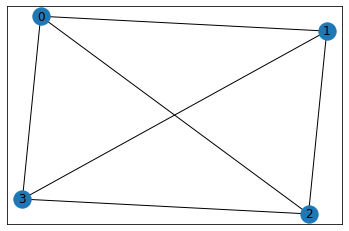

In [18]:
nx.draw_networkx(G)

In [19]:
labels = nx.get_edge_attributes(G,'weight')


In [20]:
pos=nx.get_node_attributes(G,'pos')


In [21]:
labels

{(0, 0): 0.0,
 (0, 1): 282.842712474619,
 (0, 2): 282.842712474619,
 (0, 3): 400.0,
 (1, 1): 0.0,
 (1, 2): 400.0,
 (1, 3): 282.842712474619,
 (2, 2): 0.0,
 (2, 3): 282.842712474619,
 (3, 3): 0.0}

In [22]:
G.number_of_nodes()

4

In [23]:

import matplotlib.pyplot as plt


#to visualize how the points are scattered on the graph blue represents the pdps and red represents the sensor points

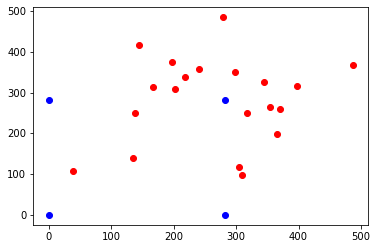

In [24]:

for i in range(len(sensor)):
    plt.scatter(sensor[i][0],sensor[i][1],c='r')
for j in range(len(pdp_positions)):
    plt.scatter(pdp_positions[j][0],pdp_positions[j][1],c='b')

#A new graph is created below ,firstly the sensor nodes are added 

In [25]:
K=nx.Graph()

In [26]:
for i in range(len(sensor)):
    K.add_node('sensor{}'.format(i),pos=sensor[i])

Now after the nodes are added then the edge between the nodes are added

In [27]:
for i in range(len(sensor)):
    for j in range(len(sensor)):
        K.add_edge("sensor{}".format(i),"sensor{}".format(j))

In [28]:
#this function is getting the the coordinate points of sensor and Graph as the argument value
#
def calulate_distance_between_each_sensors_and_assign_weight(points,K):
    distance_sensors={}
    M=K
    k=0
    edge_weight=1
    for i in range(len(points)):
        for j in range(len(points)):
            euclidean_distance=distance(points,i,j)
            if i!=j:
                if euclidean_distance<=transmission_range:
                    M["sensor{}".format(i)]["sensor{}".format(j)]['weight']=1
                    
                    distance_sensors[k]=((points[i][0],points[i][1]),(points[j][0],points[j][1])),(euclidean_distance),(edge_weight)
                else:
                    M["sensor{}".format(i)]["sensor{}".format(j)]['weight']=100
                    distance_sensors[k]=((points[i][0],points[i][1]),(points[j][0],points[j][1])),(euclidean_distance)
            k=k+1
    return distance_sensors,M

here the 'L' is a graph containing the sensor nodes and edge weights

In [29]:
euclidean_distance_between_sensor,L=calulate_distance_between_each_sensors_and_assign_weight(sensor,K)

In [30]:
euclidean_distance_between_sensor

{1: (((39, 107), (135, 140)), 101.51354589413178, 1),
 2: (((39, 107), (139, 250)), 174.49641830135081, 1),
 3: (((39, 107), (145, 417)), 327.621733100843),
 4: (((39, 107), (167, 315)), 244.22940035957996),
 5: (((39, 107), (197, 376)), 311.96954979612997),
 6: (((39, 107), (203, 308)), 259.4166532819356),
 7: (((39, 107), (219, 339)), 293.63923443572725),
 8: (((39, 107), (240, 357)), 320.78185734233784),
 9: (((39, 107), (279, 485)), 447.75439696333524),
 10: (((39, 107), (298, 351)), 355.8328259168904),
 11: (((39, 107), (304, 117)), 265.1886121235224),
 12: (((39, 107), (309, 99)), 270.1184925176357),
 13: (((39, 107), (317, 249)), 312.166622174761),
 14: (((39, 107), (345, 326)), 376.2937682183961),
 15: (((39, 107), (354, 265)), 352.40459701882435),
 16: (((39, 107), (366, 199)), 339.69545183884935),
 17: (((39, 107), (371, 259)), 365.1410686296462),
 18: (((39, 107), (398, 317)), 415.9098460003081),
 19: (((39, 107), (487, 369)), 518.9874757641074),
 20: (((135, 140), (39, 107)

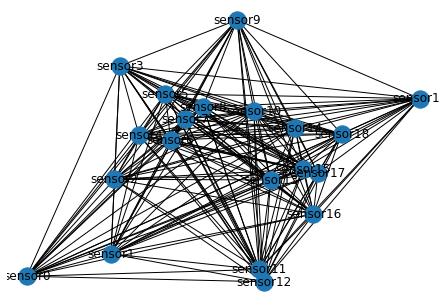

In [31]:
nx.draw(L,nx.get_node_attributes(L,'pos'),with_labels=True)

In [32]:
for i in range(len(pdp_positions)):
    L.add_node('pdp{}'.format(i),pos=pdp_positions[i])

In [33]:
for i in range(len(pdp_positions)):
    for j in range(len(sensor)):
        L.add_edge("pdp{}".format(i),"sensor{}".format(j))

In [34]:
def distance_pdp_sensors(pdp_positions,sensor,u,v):
    x=pdp_positions[u][0]-sensor[v][0]
    y=pdp_positions[u][1]-sensor[v][1]
    return math.sqrt(x*x+y*y)    

In [35]:
def calculate_distance_between_each_pdp_and_sensor(pdp_positions,sensor,K):
    J=K
    distance_pdp_each_sensor={}
    k=0
    weight=1
    for u in range(len(pdp_positions)):
        for v in range(len(sensor)):
            euclidean_distance_between_pdp_sensor=distance_pdp_sensors(pdp_positions,sensor,u,v)
            if euclidean_distance_between_pdp_sensor<=transmission_range:
                J["pdp{}".format(u)]["sensor{}".format(v)]['weight']=1
                distance_pdp_each_sensor[k]=((pdp_positions[u][0],pdp_positions[u][1]),(sensor[v][0],sensor[v][1])),(euclidean_distance_between_pdp_sensor),(weight)
            else:
                J["pdp{}".format(u)]["sensor{}".format(v)]['weight']=100
                distance_pdp_each_sensor[k]=((pdp_positions[u][0],pdp_positions[u][1]),(sensor[v][0],sensor[v][1])),(euclidean_distance_between_pdp_sensor)
            k=k+1
    return distance_pdp_each_sensor,J
            
            
            

In [36]:
distance_between_pdp_to_each_sensor,N=calculate_distance_between_each_pdp_and_sensor(pdp_positions,sensor,L)

In [37]:
distance_between_pdp_to_each_sensor

{0: (((0.0, 0.0), (39, 107)), 113.8859078200635, 1),
 1: (((0.0, 0.0), (135, 140)), 194.48650338776724, 1),
 2: (((0.0, 0.0), (139, 250)), 286.04370295463593),
 3: (((0.0, 0.0), (145, 417)), 441.4906567527789),
 4: (((0.0, 0.0), (167, 315)), 356.5305036038291),
 5: (((0.0, 0.0), (197, 376)), 424.4820373113567),
 6: (((0.0, 0.0), (203, 308)), 368.8807395351511),
 7: (((0.0, 0.0), (219, 339)), 403.58642197180023),
 8: (((0.0, 0.0), (240, 357)), 430.17322092385064),
 9: (((0.0, 0.0), (279, 485)), 559.5230111443138),
 10: (((0.0, 0.0), (298, 351)), 460.440006949874),
 11: (((0.0, 0.0), (304, 117)), 325.7376244771242),
 12: (((0.0, 0.0), (309, 99)), 324.47187859658965),
 13: (((0.0, 0.0), (317, 249)), 403.10048375064),
 14: (((0.0, 0.0), (345, 326)), 474.65882484159084),
 15: (((0.0, 0.0), (354, 265)), 442.20018091357673),
 16: (((0.0, 0.0), (366, 199)), 416.60172827293934),
 17: (((0.0, 0.0), (371, 259)), 452.4621531133847),
 18: (((0.0, 0.0), (398, 317)), 508.81529065074295),
 19: (((0.0,

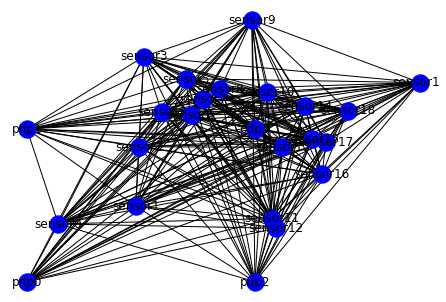

In [38]:
nx.draw(N,nx.get_node_attributes(N, 'pos'),with_labels=True,node_color='b')

In [39]:
nx.get_node_attributes(N, 'pos')

{'sensor0': (39, 107),
 'sensor1': (135, 140),
 'sensor2': (139, 250),
 'sensor3': (145, 417),
 'sensor4': (167, 315),
 'sensor5': (197, 376),
 'sensor6': (203, 308),
 'sensor7': (219, 339),
 'sensor8': (240, 357),
 'sensor9': (279, 485),
 'sensor10': (298, 351),
 'sensor11': (304, 117),
 'sensor12': (309, 99),
 'sensor13': (317, 249),
 'sensor14': (345, 326),
 'sensor15': (354, 265),
 'sensor16': (366, 199),
 'sensor17': (371, 259),
 'sensor18': (398, 317),
 'sensor19': (487, 369),
 'pdp0': (0.0, 0.0),
 'pdp1': (0.0, 282.842712474619),
 'pdp2': (282.842712474619, 0.0),
 'pdp3': (282.842712474619, 282.842712474619)}

In [40]:
N.nodes()

NodeView(('sensor0', 'sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19', 'pdp0', 'pdp1', 'pdp2', 'pdp3'))

In [41]:
N.edges.data()

EdgeDataView([('sensor0', 'sensor0', {}), ('sensor0', 'sensor1', {'weight': 1}), ('sensor0', 'sensor2', {'weight': 1}), ('sensor0', 'sensor3', {'weight': 100}), ('sensor0', 'sensor4', {'weight': 100}), ('sensor0', 'sensor5', {'weight': 100}), ('sensor0', 'sensor6', {'weight': 100}), ('sensor0', 'sensor7', {'weight': 100}), ('sensor0', 'sensor8', {'weight': 100}), ('sensor0', 'sensor9', {'weight': 100}), ('sensor0', 'sensor10', {'weight': 100}), ('sensor0', 'sensor11', {'weight': 100}), ('sensor0', 'sensor12', {'weight': 100}), ('sensor0', 'sensor13', {'weight': 100}), ('sensor0', 'sensor14', {'weight': 100}), ('sensor0', 'sensor15', {'weight': 100}), ('sensor0', 'sensor16', {'weight': 100}), ('sensor0', 'sensor17', {'weight': 100}), ('sensor0', 'sensor18', {'weight': 100}), ('sensor0', 'sensor19', {'weight': 100}), ('sensor0', 'pdp0', {'weight': 1}), ('sensor0', 'pdp1', {'weight': 1}), ('sensor0', 'pdp2', {'weight': 100}), ('sensor0', 'pdp3', {'weight': 100}), ('sensor1', 'sensor1', {}

In [42]:
nx.get_edge_attributes(N,"weight")

{('sensor0', 'sensor1'): 1,
 ('sensor0', 'sensor2'): 1,
 ('sensor0', 'sensor3'): 100,
 ('sensor0', 'sensor4'): 100,
 ('sensor0', 'sensor5'): 100,
 ('sensor0', 'sensor6'): 100,
 ('sensor0', 'sensor7'): 100,
 ('sensor0', 'sensor8'): 100,
 ('sensor0', 'sensor9'): 100,
 ('sensor0', 'sensor10'): 100,
 ('sensor0', 'sensor11'): 100,
 ('sensor0', 'sensor12'): 100,
 ('sensor0', 'sensor13'): 100,
 ('sensor0', 'sensor14'): 100,
 ('sensor0', 'sensor15'): 100,
 ('sensor0', 'sensor16'): 100,
 ('sensor0', 'sensor17'): 100,
 ('sensor0', 'sensor18'): 100,
 ('sensor0', 'sensor19'): 100,
 ('sensor0', 'pdp0'): 1,
 ('sensor0', 'pdp1'): 1,
 ('sensor0', 'pdp2'): 100,
 ('sensor0', 'pdp3'): 100,
 ('sensor1', 'sensor2'): 1,
 ('sensor1', 'sensor3'): 100,
 ('sensor1', 'sensor4'): 1,
 ('sensor1', 'sensor5'): 100,
 ('sensor1', 'sensor6'): 1,
 ('sensor1', 'sensor7'): 100,
 ('sensor1', 'sensor8'): 100,
 ('sensor1', 'sensor9'): 100,
 ('sensor1', 'sensor10'): 100,
 ('sensor1', 'sensor11'): 1,
 ('sensor1', 'sensor12'): 

In [43]:
k=0
shortest_path={}
for i in range(len(pdp_positions)):
    for j in range(len(sensor)):
        shortest_path[k]=nx.shortest_path(N,source='pdp{}'.format(i),target='sensor{}'.format(j),weight='weight',method='dijkstra')
        k=k+1
        

In [44]:
shortest_path

{0: ['pdp0', 'sensor0'],
 1: ['pdp0', 'sensor1'],
 2: ['pdp0', 'sensor0', 'sensor2'],
 3: ['pdp0', 'sensor0', 'sensor2', 'sensor3'],
 4: ['pdp0', 'sensor1', 'sensor4'],
 5: ['pdp0', 'sensor0', 'sensor2', 'sensor5'],
 6: ['pdp0', 'sensor1', 'sensor6'],
 7: ['pdp0', 'sensor0', 'sensor2', 'sensor7'],
 8: ['pdp0', 'sensor0', 'sensor2', 'sensor8'],
 9: ['pdp0', 'sensor1', 'sensor6', 'sensor9'],
 10: ['pdp0', 'sensor0', 'sensor2', 'sensor10'],
 11: ['pdp0', 'sensor1', 'sensor11'],
 12: ['pdp0', 'sensor1', 'sensor12'],
 13: ['pdp0', 'sensor0', 'sensor2', 'sensor13'],
 14: ['pdp0', 'sensor1', 'sensor4', 'sensor14'],
 15: ['pdp0', 'sensor1', 'sensor4', 'sensor15'],
 16: ['pdp0', 'sensor1', 'sensor6', 'sensor16'],
 17: ['pdp0', 'sensor1', 'sensor6', 'sensor17'],
 18: ['pdp0', 'sensor1', 'sensor6', 'sensor18'],
 19: ['pdp0', 'sensor0', 'sensor2', 'sensor10', 'sensor19'],
 20: ['pdp1', 'sensor0'],
 21: ['pdp1', 'sensor1'],
 22: ['pdp1', 'sensor2'],
 23: ['pdp1', 'sensor3'],
 24: ['pdp1', 'sensor4'

In [137]:
N.nodes()

NodeView(('sensor0', 'sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19', 'pdp0', 'pdp1', 'pdp2', 'pdp3'))

In [138]:
pos_list=list(nx.get_node_attributes(N,'pos'))

In [141]:
pos_list[1][0]

's'